# 1.数据读取

In [0]:
import pandas as pd
df = pd.read_csv("./data/Coding_results_5000.csv")#,encoding = "gb18030"

In [0]:
# df.head()
df.shape

(5000, 4)

In [0]:
# df.head()
# df.shape
# df.tail()
# df = df[["id","title"]]
df.head()

,no,id,title,Category
0,Thread17,4.927166e+09,有没有有经验的家长可以来分享一下怎么做才能使孩子变得更好,0
1,Thread30,4.930934e+09,请教各位有自闭症孩子的家长……,0
2,Thread35,4.932980e+09,闭儿发烧了,0
3,Thread92,4.948806e+09,好心人帮帮我，我该何去何从,0
4,Thread101,4.953448e+09,求助我儿到底是不是自闭症,0


In [0]:
import jieba
def seg(s):
    segments = jieba.lcut(s) 
    s = " ".join(segments)
    return s

In [0]:
df["title_seg"] = df["title"].apply(seg)
df["title_seg"][0]

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\hanxu\AppData\Local\Temp\jieba.cache
Loading model cost 0.864 seconds.
Prefix dict has been built succesfully.


'有没有 有 经验 的 家长 可以 来 分享 一下 怎么 做 才能 使 孩子 变得 更好'

# 2.数据清洗和预处理

###### 哈工大中文停用词

In [0]:
with open("cnstopword.txt", 'r', encoding='utf-8-sig') as f:
    stoptext = f.read()
    stoplist = stoptext.split(';\n')
    cnstopwords = set(stoplist)
hgdstopword = pd.read_csv("./data/stop.csv",encoding = "gb18030")
hgdstop = set(stopword["stopwords"])

In [0]:
"孩子" in stop

False

###### 只保留字符串中的中文字符

In [0]:
import re
pattern="[\u4e00-\u9fa5]+" 
regex = re.compile(pattern)
def cn_only(s): 
    result = regex.findall(s)
    te = " ".join([wd for wd in result])
    return te

###### 繁体->简体

In [0]:
from langconv import *
import sys
# 转换繁体到简体
def cht_to_chs(line):
    line = Converter('zh-hans').convert(line)
    line.encode('utf-8')
    return line

In [0]:
from zhon.hanzi import punctuation
import nltk
import pandas as pd
import string
import re
# nltk.download()
cnexclude = set(punctuation)#cn标点符号
enexclude = set(string.punctuation)#eng标点符号
exclude = cnexclude | enexclude
# more_exclude =["︰","%","."]
# for ex in more_exclude:
#     exclude.add(ex)
stop = cnstopwords | hgdstop


#数据清理
def clean(doc_seg):
    chs = cht_to_chs(doc_seg)
    eng_free = cn_only(chs)
    stop_free = " ".join([wd for wd in eng_free.split() if wd not in stop])# 
    punc_free = " ".join(ch for ch in stop_free.split() if ch not in exclude)
#     eng_free = re.sub('[a-zA-Z0-9]','',punc_free) #remove english string
    cleaned = punc_free.strip() #remove space
    return cleaned

## 2.1对title应用clean()函数

### 2.1.1celan()函数测试

In [0]:
test = df["title_seg"][999]
test

'1278550345 @ qq . com 感谢 有心 的 宝妈 分享 ， 烦请 您 也 将 家庭 干预 资料 发 我 一份 ， 十分 感激'

In [0]:
clean(test)

'感谢 有心 宝妈 分享 烦请 家庭 干预 资料 发 一份 感激'

### 2.1.2celan()函数使用

In [0]:
# df["title_clean"] = df.title_seg.apply(clean)
# df.shape
df.to_csv("./data/Coding_results_5000_seg_clean.csv",encoding = "gb18030",index=False)

In [0]:
#对预处理结果进行保存，这样每次运行只需要从文件里读数据即可
import pandas as pd
df=pd.read_csv("./data/thread_seg_clean.csv",encoding = "gb18030",index_col=0)
# df["title_cutted"] 

In [0]:
df.tail(5)

,no,id,title,Category,title_seg,title_clean
4995,Post68471,1.256390e+11,今天看见妹妹拉粑粑，会跑过去找姥姥，说，姥姥，妹妹拉屎了。吃完了手上的西瓜，说，我没有了。,0,今天 看见 妹妹 拉粑 粑 ， 会 跑 过去 找 姥姥 ， 说 ， 姥姥 ， 妹妹 拉屎 了...,妹妹 拉粑 粑 跑 找 姥姥 说 姥姥 妹妹 拉屎 吃 完 手上 西瓜 说
4996,Post68475,1.256400e+11,晚上宝宝在客厅自己玩，渴了想喝茶，自己拿杯子去喝，不知道是没拿稳，还是什么杯子掉在了桌上砸碎...,0,晚上 宝宝 在 客厅 自己 玩 ， 渴 了 想 喝茶 ， 自己 拿 杯子 去 喝 ， 不 知...,晚上 宝宝 客厅 玩 渴 想 喝茶 杯子 喝 拿稳 杯子 掉 桌上 砸碎 听到 声音 吓了一...
4997,Post68544,1.256450e+11,已经很好了！,0,已经 很 好 了 ！,
4998,Post68559,1.256470e+11,孩子每天都在笑，我们大人不应该好好笑着面对么\r\r\r\n http://imgsrc.b...,0,孩子 每天 都 在 笑 ， 我们 大人 不 应该 好好笑 着 面对 么 \r \r \r\n...,孩子 笑 大人 好好笑 面对
4999,Post68560,1.256470e+11,能挂到号吗？,0,能 挂到 号 吗 ？,挂到 号


## 2.2提取title_clean为corpus

In [0]:
import pandas as pd
df = pd.read_csv("/content/Coding_results_5000_seg_clean.csv",encoding = "gb18030")
df.head()

,no,id,title,Category,title_seg,title_clean
0,Thread17,4.927166e+09,有没有有经验的家长可以来分享一下怎么做才能使孩子变得更好,0,有没有 有 经验 的 家长 可以 来 分享 一下 怎么 做 才能 使 孩子 变得 更好,有没有 经验 家长 分享 做 孩子 变得 更好
1,Thread30,4.930934e+09,请教各位有自闭症孩子的家长……,0,请教 各位 有 自闭症 孩子 的 家长 … …,请教 自闭症 孩子 家长
2,Thread35,4.932980e+09,闭儿发烧了,0,闭儿 发烧 了,闭儿 发烧
3,Thread92,4.948806e+09,好心人帮帮我，我该何去何从,0,好心人 帮帮我 ， 我该 何去何从,好心人 帮帮我 我该 何去何从
4,Thread101,4.953448e+09,求助我儿到底是不是自闭症,0,求助 我儿 到底 是不是 自闭症,求助 我儿 自闭症


In [0]:
corpus = df['title_clean']
corpus.head()

0    有没有 经验 家长 分享 做 孩子 变得 更好
1               请教 自闭症 孩子 家长
2                      闭儿 发烧
3            好心人 帮帮我 我该 何去何从
4                  求助 我儿 自闭症
Name: title_clean, dtype: object

In [0]:
# "nan" in corpus
type(corpus)
len(corpus)

5000

In [0]:
# # Import Dataset
# import pandas as pd
# df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
# print(df.target_names.unique())
# import re
# # Convert to list
# data = df.content.values.tolist()

# # Remove Emails
# data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# # Remove new line characters
# data = [re.sub('\s+', ' ', sent) for sent in data]

# # Remove distracting single quotes
# data = [re.sub("\'", "", sent) for sent in data]

# pprint(data[:1])
# def sent_to_words(sentences):
#     for sentence in sentences:
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# data_words = list(sent_to_words(data))

# print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


In [0]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
#     return texts_out

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # Run in terminal: python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# # Do lemmatization keeping only Noun, Adj, Verb, Adverb
# data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# # print(data_lemmatized[:2])
# vectorizer = CountVectorizer(analyzer='word',       
#                              min_df=10,                        # minimum reqd occurences of a word 
#                              stop_words='english',             # remove stop words
#                              lowercase=True,                   # convert all words to lowercase
#                              token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
#                              # max_features=50000,             # max number of uniq words
#                             )

# data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [0]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [0]:
data_lemmatized[0:10]

['where s thing subject car be nntp post host rac wam umd edu organization university maryland college park line be wonder anyone out there could enlighten car see other day be door sport car look be late early be call bricklin door be really small addition front bumper be separate rest body be know anyone can tellme model name engine spec year production where car be make history info have funky look car mail thank bring neighborhood lerxst',
 'guy kuo subject si clock poll final call summary final call si clock report keyword si acceleration clock upgrade article shelley qvfo innc organization university washington line nntp post host carson washington fair number brave soul upgrade si clock oscillator have share experience poll send brief message detail experience procedure top speed attain cpu rate speed add card adapter heat sink hour usage day floppy disk functionality floppy be especially request will be summarize next day so add network knowledge base have do clock upgrade have

In [0]:
df.shape

(4896, 6)

# 3.生成文档词频矩阵，创建LDA主题模型

## 3.1 Use sklearn

In [0]:
data = [title for title in df.title_clean]

In [0]:
def rm_t(doc):
  cleaned = " ".join([wd for wd in doc.split() if wd in tail])# 
  return cleaned

def rm_h(doc):
  cleaned = " ".join([wd for wd in doc.split() if wd not in head])# 
  return cleaned

def rm_co(doc):
  cleaned = " ".join([wd for wd in doc.split() if wd in co])# 
  return cleaned

In [0]:
# df["title_rmtail"] = df.title_clean.apply(rm_t)
# df["title_rmhead"] = df.title_clean.apply(rm_h)
df["title_rmco"] = df.title_clean.apply(rm_co)
# df.head()
co[0]

'现在'

In [0]:
df.to_csv("./Coding_results_5000_rm.csv",encoding = "gb18030",index=False)

In [0]:
corpus = df['title_rmco']
corpus.head()

0    有没有 经验 家长 分享 一下 做 变得 更好
1                      请教 家长
2                         发烧
3            好心人 帮帮我 我该 何去何从
4               求助 我儿 到底 是不是
Name: title_rmco, dtype: object

### 3.1.1 模型构建

###### 参数

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_features=5000#, max_df=1, min_df=0.01,                                
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features)#,max_df=0.95, min_df=2 max_features=n_features,stop_words=stoplist

#tf_vectorizer = CountVectorizer(strip_accents = 'unicode',max_features=n_features,stop_words='english',max_df = 0.5,min_df = 10)
doc_term_matrix = vectorizer.fit_transform(corpus.values.astype('U'))

In [0]:
import matplotlib as plt
grid = dict()
for i in range(1,7,1): ###10个主题，以1为间隔
    grid[i] = list()
    n_topics = i
    lda = LatentDirichletAllocation(n_components=n_topics,learning_method='batch',random_state=100) ###定义lda模型
    lda.fit(doc_term_matrix) ###训练参数
#     train_gamma = lda.transform(doc_term_matrix) ##得到topic-document 分布
    perplexity = lda.perplexity(doc_term_matrix)
#     test_perplexity = lda.perplexity(tf_test) ###s计算测试集困惑度
    print('sklearn preplexity: number of topic%d = %.3f' %(i,perplexity))
    grid[i].append(perplexity)

visdf = pd.DataFrame(grid)

sklearn preplexity: number of topic1 = 1839.298
sklearn preplexity: number of topic2 = 1704.585
sklearn preplexity: number of topic3 = 1720.571
sklearn preplexity: number of topic4 = 1761.746
sklearn preplexity: number of topic5 = 1810.238
sklearn preplexity: number of topic6 = 1862.153


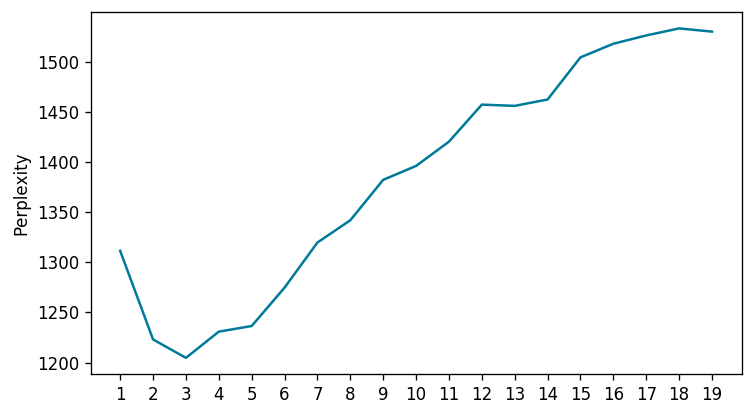

In [0]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(7,4), dpi=120)
#plt.subplot(221)
plt.plot(visdf.columns.values, visdf.iloc[0].values, '#007A99')
plt.xticks(visdf.columns.values)
plt.ylabel('Perplexity')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

NameError: ignored

In [0]:
# Define Search Param
search_params = {'n_components': [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(doc_term_matrix)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [0]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(doc_term_matrix))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 6}
Best Log Likelihood Score:  -207171.11248206938
Model Perplexity:  1578.006443843221


### 3.1.2 Doc_Topic结果
训练LDA的一大目的就是分析一篇文章的话题分布，这才能使得模型创造更高的价值。利用已训练好的模型将doc转换为话题分布的函数及结果如下：

In [0]:
doc_topic_dist = lda_model.transform(doc_term_matrix)

In [0]:
doc_topic_dist#属于某一主题的概率

array([[0.01786682, 0.65413104, 0.31013294, 0.0178692 ],
       [0.05107433, 0.05022671, 0.84860611, 0.05009285],
       [0.05133971, 0.05023923, 0.84832211, 0.05009895],
       ...,
       [0.04556487, 0.04168631, 0.36519764, 0.54755117],
       [0.08807773, 0.0835793 , 0.74494243, 0.08340054],
       [0.31070905, 0.56056866, 0.06502399, 0.0636983 ]])

### 3.1.3模型保存

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib  #也可以选择pickle等保存模型

#构建词汇统计向量并保存，仅运行首次
n_features=2500
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(corpus)
joblib.dump(tf_vectorizer,"tf_vectorizer.pkl" )
#==============================================================================
# #得到存储的tf_vectorizer,节省预处理时间
# tf_vectorizer = joblib.load("tf_vectorizer.pkl")
# tf1 = tf_vectorizer.fit_transform(corpus)
#==============================================================================

### 3.1.4困惑度preplexity计算

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('sklearn_perplexity.csv')
plt.figure(figsize=(4,3), dpi=120)
#plt.subplot(221)
plt.plot(df.columns.values, df.iloc[0].values, '#007A99')
plt.xticks(df.columns.values)
plt.ylabel('train Perplexity')
plt.show()
# plt.savefig('lda_topic_perplexity.png', bbox_inches='tight', pad_inches=0.1)

### 3.1.5 top-term 输出

In [0]:
#定义以下的函数，把每个主题里面的前若干个关键词显示出来：
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [0]:
n_top_words = 30
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda_model, tf_feature_names, n_top_words)

Topic #0:
老师 机构 儿子 康复 医院 希望 幼儿园 医生 真的 干预 小孩 自闭 诊断 交流 确诊 时间 妈妈 小朋友 北京 有没有 说话 检查 朋友 分享 情况 发现 两个 一点 工作 女儿
Topic #1:
喜欢 宝宝 妈妈 东西 说话 小朋友 爸爸 大人 玩具 眼神 有时候 特别 感觉 对视 爸爸妈妈 我家 医生 一岁 主动 他会 家里 指令 交流 奶奶 看着 指物 名字 不好 检查 只会
Topic #2:
训练 语言 能力 游戏 老师 沟通 动作 自闭 模仿 学习 物品 方法 指令 表达 理解 食物 东西 辅助 主动 注意力 玩具 强化 简单 发展 回答 幼儿 妈妈 重复 正确 运动
Topic #3:
干预 训练 孤独症 父母 生活 教育 家庭 社会 学习 情绪 治疗 康复 障碍 能力 老师 学校 成长 活动 早期 患儿 发育 中心 世界 社交 融合 发展 时间 方法 机构 环境
Topic #4:
语言 能力 障碍 治疗 研究 患者 发育 功能 活动 感觉 表现 一种 发展 音乐 导致 说话 认知 发现 理解 异常 大脑 意识 方式 原因 训练 交流 影响 症状 诊断 方法



### 3.1.6pyLDAvis可视化

In [0]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
data = pyLDAvis.sklearn.prepare(lda_model, doc_term_matrix, vectorizer,sort_topics=True)
pyLDAvis.display(data,local=True)

D:\Program Files\WPy-3702\python-3.7.0.amd64\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


###### topic 1：  topic 3：  topic 2：

### 3.2 Use gensim 

#### 数据读取

In [0]:
import pandas as pd
df=pd.read_csv("/content/Coding_results_5000_rmhead.csv",encoding = "gb18030",index_col=0)
#删除缺失值，并重设索引index
df.dropna(axis=0, how='any', inplace=True)
# # # df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
df.shape

(4891, 7)

In [0]:
# df['title_clean'] = df['title_clean'].astype('str')

#### 增加停用词

In [0]:
with open("cnstopwords.txt", 'r', encoding='utf-8') as f:
    stoptext = f.read()
    stoplist = stoptext.split(';\n')
    cnstopwords = set(stoplist)

#### 构建语料

In [0]:
# sstop = ["孩子","自闭症",'儿童','家长','语言','训练','喜欢','老师','妈妈','能力','说话','宝宝','干预']
# expend = [["孩子","自闭症",'会','说']
texts = []
for i in range(df.shape[0]):
    wdlst = []
    for wd in df["title_rmhead"][i].split():
      wdlst.append(wd)
        #增加停用词：
#         if not wd in cnstopwords:
#             if not wd in sstop:
                #去除单字
        # if len(wd) > 1:
        #     wdlst.append(wd)
    texts.append(wdlst)

In [0]:
texts[0]

['有没有', '经验', '家长', '分享', '一下', '做', '变得', '更好']

In [0]:
texts[0]

['有没有', '经验', '家长', '分享', '一下', '做', '变得', '更好']

#### 词频统计

In [0]:
dictionary = {}
for text in texts:
    for word in text:
        if not word in dictionary:
            dictionary[word] = 1
        else:
            dictionary[word]+= 1

In [0]:
from operator import itemgetter  
data_order = sorted(dictionary.items(),key=itemgetter(1),reverse=True)
data_order[:10]

[('孩子', 3446),
 ('会', 1699),
 ('说', 1678),
 ('自闭症', 1389),
 ('现在', 805),
 ('没有', 788),
 ('语言', 739),
 ('问题', 677),
 ('一个', 675),
 ('玩', 667)]

In [0]:
head=[]
tail=[]
co=[]
for item in data_order:
  if item[1]>1:
    tail.append(item[0])
  if item[1]>1000:
    head.append(item[0])
  if item[1]>1 and item[1]<1000:
    co.append(item[0])

#### 构建gensim模型

##### 1.models.ldamodel 

In [0]:
from gensim.corpora.dictionary import Dictionary
from gensim import models
import gensim
# Create a corpus from a list of texts
id2word = Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

In [0]:
# Train the model on the corpus.
lda_model = models.LdaMulticore(corpus, id2word=id2word, num_topics=79)

###### 文章主题输出

In [0]:
top20_terms = lda_model.print_topics(num_topics=79, num_words=20)

In [0]:
top20_terms[1]

(1,
 '0.017*"语言" + 0.010*"认知" + 0.007*"感统" + 0.007*"最好" + 0.007*"沟通" + 0.007*"今天" + 0.007*"听觉" + 0.007*"知道" + 0.007*"一节" + 0.006*"姥姥" + 0.006*"指令" + 0.006*"顶" + 0.006*"玩" + 0.006*"没有" + 0.005*"谢谢" + 0.005*"宝宝" + 0.005*"理解" + 0.005*"拉" + 0.005*"简单" + 0.005*"一下"')

In [0]:
with open('./top20_terms.txt', 'a+',encoding = "utf-8-sig") as f:
    for line in top20_terms[0:]:
      f.write(str(line) + "\n") 

###### 文章主题偏好（概率向量）

In [0]:
ls = lda_model.get_document_topics(corpus[3],minimum_probability = 0)
ls

In [0]:
from pandas.core.frame import DataFrame
coherence=DataFrame()
for i in range(0,df.shape[0]):
    coher = lda_model.get_document_topics(corpus[i],minimum_probability = 0)
    cohe = DataFrame(coher).T
    coh = cohe.tail(1)
    
    coherence = pd.concat([coherence,coh])

In [0]:
#删除重复索引
coherence = coherence.reset_index(drop = True)

In [0]:
#  coherence.columns = ['Topic1', 'mix_types', 'value']
# svm_lda_topic79 = pd.concat([df,coherence],axis=1)
svm_lda_topic79.to_csv('./svm_lda_topic79.csv',encoding='gb18030')

In [0]:
svm_lda_topic79.head()


,no,id,title,Category,title_seg,title_clean,title_rmhead,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,Thread17,4.927166e+09,有没有有经验的家长可以来分享一下怎么做才能使孩子变得更好,0,有没有 有 经验 的 家长 可以 来 分享 一下 怎么 做 才能 使 孩子 变得 更好,有没有 经验 家长 分享 一下 做 孩子 变得 更好,有没有 经验 家长 分享 一下 做 变得 更好,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.735060,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,...,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.156642,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406,0.001406
1,Thread30,4.930934e+09,请教各位有自闭症孩子的家长……,0,请教 各位 有 自闭症 孩子 的 家长 … …,请教 自闭症 孩子 家长,请教 家长,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.670886,...,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219
2,Thread35,4.932980e+09,闭儿发烧了,0,闭儿 发烧 了,闭儿 发烧,闭儿 发烧,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.670886,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,...,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219,0.004219
3,Thread92,4.948806e+09,好心人帮帮我，我该何去何从,0,好心人 帮帮我 ， 我该 何去何从,好心人 帮帮我 我该 何去何从,好心人 帮帮我 我该 何去何从,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.293155,0.002532,0.002532,0.002532,0.202532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,...,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.311908,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532
4,Thread101,4.953448e+09,求助我儿到底是不是自闭症,0,求助 我儿 到底 是不是 自闭症,求助 我儿 到底 是不是 自闭症,求助 我儿 到底 是不是,0.002532,0.002532,0.802532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,...,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.002532,0.0025

#### How to find the optimal number of topics for LDA,计算Coherence

###### method2

In [0]:
from gensim.models import CoherenceModel
# Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [0]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):#, a, b
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
#                                            alpha=a,
#                                            eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [0]:
import pandas as pd
import numpy as np
import tqdm
grid = {}
# grid['Validation_Set'] = {}
# Topics range
min_topics = 1
max_topics = 100
step_size = 2
topics_range = range(min_topics, max_topics, step_size)
model_results = {
                 'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
                 'Coherence': []
                }

In [0]:
# compute_coherence_values(corpus=corpus_sets[1], dictionary=id2word, k=4, a=0.01, b=0.1)
compute_coherence_values(corpus, dictionary=id2word, k=4)

0.4287935523645567

In [0]:
# Can take a long time to run
import time
st=time.time()
for k in topics_range:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)
    print("k:",cv)
codf = pd.DataFrame(model_results)
en=time.time()
print("time spend:",en-st)

In [0]:
codf.to_csv("coherence.csv",encoding="gb18030")

In [0]:
# codf

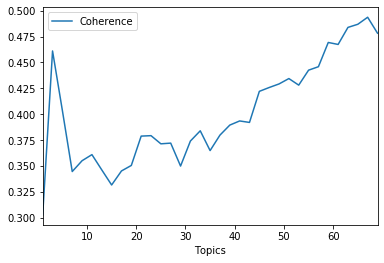

In [0]:
codf.plot(x="Topics",y="Coherence")

In [0]:
codf.append(codf)

,Topics,Coherence
0,1,0.302615
1,3,0.428465
2,5,0.446530
3,7,0.333943
4,9,0.376224
5,11,0.365727
6,13,0.340253
7,15,0.362906
8,17,0.358080
9,19,0.365149


In [0]:
# # Can take a long time to run
# if 1 == 1:
# #     pbar = tqdm.tqdm(total=270)
#     # iterate through number of topics
#     for k in topics_range:
#         # iterate through alpha values
#         for a in alpha:
#             # iterare through beta values
#             for b in beta:
#                 # get the coherence score for the given parameters
#                 cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k, a=a, b=b)
#                 # Save the model results
#                 model_results['Topics'].append(k)
#                 model_results['Alpha'].append(a)
#                 model_results['Beta'].append(b)
#                 model_results['Coherence'].append(cv)
                    
# #                     pbar.update(1)
#     mydf = pd.DataFrame(model_results)#.to_csv('lda_tuning_results.csv', index=False)
# #     pbar.close()

In [0]:
#文章主题偏好
lda_model.get_document_topics(corpus[0])
# lda_model.get_document_topics(doc_term_matrix[0],minimum_probability = 0)

[(0, 0.083470106),
 (1, 0.083469026),
 (2, 0.08346832),
 (3, 0.08347188),
 (4, 0.08347014),
 (5, 0.58265054)]

In [0]:
#单词的主题偏好
lda_model.get_term_topics()

In [0]:
lda_model.get_topic_terms(3, topn=10)
lda_model.get_topics()[0]

array([0.00017413, 0.0010699 , 0.00014287, ..., 0.00010118, 0.00010117,
       0.00010117], dtype=float32)

In [0]:
#输入主题号，得到每个主题哪些重要词+重要词概率
lda.show_topics(num_words=10)
lda.show_topic(0, topn=10)

[('孩子', 0.020434601),
 ('说', 0.01866936),
 ('儿子', 0.008344503),
 ('自闭症', 0.008170336),
 ('会', 0.007043532),
 ('家长', 0.0069401464),
 ('做', 0.0064094993),
 ('一个', 0.006155566),
 ('训练', 0.005903075),
 ('妈妈', 0.005744496)]

In [0]:
a = lda_model.log_perplexity(doc_term_matrix)
a

-8.32681457931121

In [0]:
top_topics = lda.top_topics(doc_term_matrix)
tc = sum([t[1] for t in top_topics])
tc
# # top_topics[0]
# num_topics = 7
# avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
# print('Average topic coherence: %.4f.' % avg_topic_coherence)

##### 2.models.ldamulticore

In [0]:
# ldamulticore
lda = models.LdaMulticore(doc_term_matrix, id2word=dictionary, num_topics=7)

#### 主题可视化

In [0]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary,mds='mmds')#
# pyLDAvis.display(vis)

D:\Program Files\WPy-3702\python-3.7.0.amd64\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [0]:
pyLDAvis.display(vis)

In [0]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel
hdp = HdpModel(corpus, id2word=id2word)

D:\Program Files\WPy-3702\python-3.7.0.amd64\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


In [0]:
topic_info = hdp.print_topics(num_topics=3, num_words=10)
topic_info

[(0,
  '0.043*孩子 + 0.021*自闭症 + 0.009*儿童 + 0.009*家长 + 0.007*语言 + 0.007*喜欢 + 0.006*训练 + 0.005*老师 + 0.005*妈妈 + 0.005*说话'),
 (1,
  '0.032*自闭症 + 0.028*孩子 + 0.015*儿童 + 0.008*家长 + 0.007*训练 + 0.006*语言 + 0.005*机构 + 0.004*康复 + 0.004*治疗 + 0.004*能力'),
 (2,
  '0.023*孩子 + 0.021*自闭症 + 0.007*儿童 + 0.007*家长 + 0.004*老师 + 0.004*小朋友 + 0.004*儿子 + 0.003*机构 + 0.003*干预 + 0.003*语言')]

In [0]:
topic_info = hdp.print_topics(num_topics=6, num_words=10)
topic_info

[(0,
  '0.043*孩子 + 0.021*自闭症 + 0.009*儿童 + 0.009*家长 + 0.007*语言 + 0.007*喜欢 + 0.006*训练 + 0.005*老师 + 0.005*妈妈 + 0.005*说话'),
 (1,
  '0.032*自闭症 + 0.028*孩子 + 0.015*儿童 + 0.008*家长 + 0.007*训练 + 0.006*语言 + 0.005*机构 + 0.004*康复 + 0.004*治疗 + 0.004*能力'),
 (2,
  '0.023*孩子 + 0.021*自闭症 + 0.007*儿童 + 0.007*家长 + 0.004*老师 + 0.004*小朋友 + 0.004*儿子 + 0.003*机构 + 0.003*干预 + 0.003*语言'),
 (3,
  '0.027*自闭症 + 0.019*孩子 + 0.010*儿童 + 0.007*家长 + 0.006*训练 + 0.006*机构 + 0.004*治疗 + 0.004*老师 + 0.003*孤独症 + 0.003*中心'),
 (4,
  '0.020*自闭症 + 0.019*孩子 + 0.007*儿童 + 0.005*家长 + 0.004*机构 + 0.004*治疗 + 0.004*语言 + 0.003*模仿 + 0.003*宝宝 + 0.003*训练'),
 (5,
  '0.034*自闭症 + 0.016*孩子 + 0.013*干预 + 0.009*早期 + 0.007*融合 + 0.006*世界 + 0.006*治疗 + 0.005*训练 + 0.005*主题 + 0.005*儿童')]